# _Modeling of Qubit Chain_

<img src="images/line_qubits.png" alt="Qubit Chain">


### Contributor
Alexander Yu. Vlasov
***

The model may be illustrated using images from composer.
First image is for one step of quantum walk. 
Each step uses two partitions described earlier.
For five qubits each partition includes two two-qubit gates denoted here as m1 and m2

<img src="images/qx_quchain.png" alt="Q-Walk Firts Step">

Two (or more) steps of quantum walk should repeat the sequences of gates described above 

<img src="images/qx_quchain_t2.png" alt="Q-Walk Two Steps">

The program below uses QISKit with the similar purposes.

Parameter `n_nodes` is used for number of nodes and should be odd due to implementation of partitions.

Parameter `n_step` is number of steps.

Boolean parameter `hist` provides two method of simulation. 
The example below uses `hist = True`. 
In such a case simulator probabilities of different outcomes. 
The `hist = False` uses specific `qasm_simulator` backend trick - it may calculate amplitudes.
It may be useful sometimes, but `unitary_simulator` may be more convenient 
(see link and comments below).


In [1]:
from pprint import pprint
import math
import numpy as np

# importing the Qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import Aer, execute
# import state tomography functions
from qiskit.tools.visualization import plot_histogram, plot_state

# Definition of matchgate

def gate_mu3(qcirc,theta,phi,lam,a,b):
    qcirc.cx(a,b)
    qcirc.cu3(theta,phi,lam,b,a)
    qcirc.cx(a,b)
    
# Number of qubits (should be odd)
n_nodes = 5 

# Number of steps
n_step = 2

# Histogram
hist = True
# Quantum Sphere
#hist = False


# Creating Registers
qr = QuantumRegister(n_nodes) 
cr = ClassicalRegister(n_nodes)

# Creating Circuits
qc = QuantumCircuit(qr,cr)

# Initial state
qc.x(qr[0])

# Creating of two partitions with M1' and M2
# Repeating that n_step times

for k in range(0,n_step):
    for i in range(0,n_nodes-1,2):
        gate_mu3(qc,math.pi, math.pi, 0, qr[i], qr[i+1])
    for i in range(1,n_nodes,2):
        gate_mu3(qc,math.pi/2, 0, 0, qr[i], qr[i+1])

if hist:
    for i in range(0,n_nodes):
        qc.measure(qr[i], cr[i])


# To print the circuit  
# QASM_source = qc.qasm()
# print(QASM_source)


backend = 'qasm_simulator' 

if hist:
    shots = 4096
else:
    shots = 1   # backend 'trick': produces amplitudes instead of probabilities
    
job = execute(qc, Aer.get_backend(backend), shots = shots ) # Execute quantum walk 
result = job.result()

print(result)



COMPLETED


The result of simulation represented below as histogram if `hist=True` 
(or as Quantum Sphere if `hist=False`)

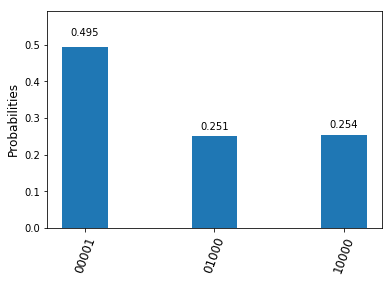

In [2]:
if hist:
    plot_histogram(result.get_counts(qc))
else:    
    data_ampl = result.get_data(qc)
    state_walk = data_ampl['quantum_state']
    rho_walk = np.outer(state_walk,state_walk.conj())
    plot_state(rho_walk,'qsphere')


The correct result should represent nonzero values only for states with one unit in computational basis.
It may be illustrative to use Quantum Sphere for such a data. Such a representation for
_many steps_ of quantum walk is shown in [next notebook](qubit_chain_mod_many.ipynb).
However trick used there is _only for simulations_. 